In [92]:
%matplotlib inline
from random import randint
from qiskit import *

In [93]:
secret_string = bin(randint(0, 2**7 - 1))[2:]
n = len(secret_string)

C:\Users\jairo\anaconda\envs\qiskit-stable\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


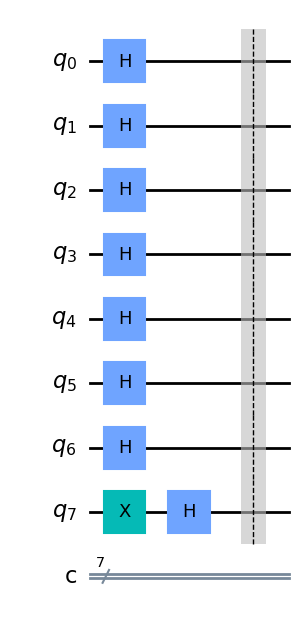

In [94]:
start_circuit=QuantumCircuit(n+1,n)
start_circuit.x(n)
start_circuit.h(range(n+1))
start_circuit.barrier()
start_circuit.draw('mpl')

C:\Users\jairo\AppData\Local\Temp\ipykernel_22340\1315019568.py:5: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.i()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use QuantumCircuit.id as direct replacement.
  oracle.i(q)


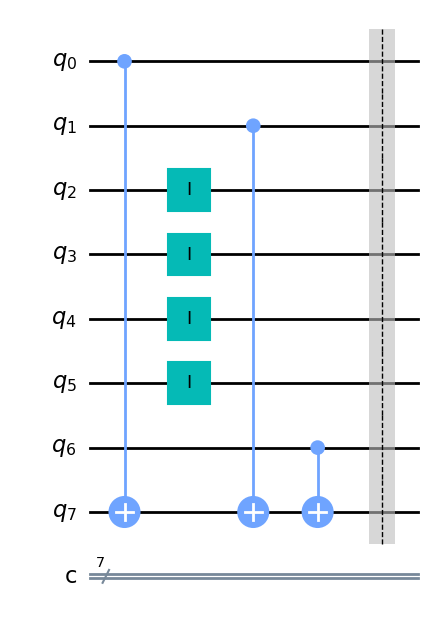

In [95]:
oracle=QuantumCircuit(n+1,n,name="Oracle")
s = s[::-1] # reverse s to fit qiskit's qubit ordering
for q in range(n):
    if secret_string[q] == '0':
        oracle.i(q)
    else:
        oracle.cx(q, n)
oracle.barrier()
oracle.draw('mpl')

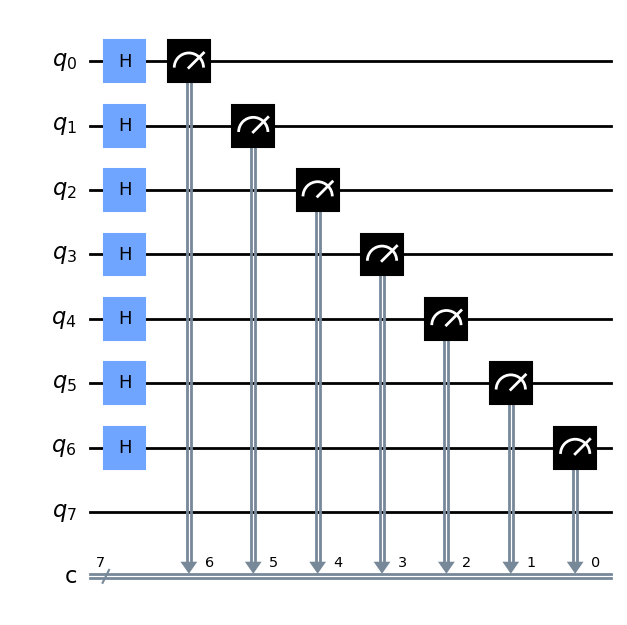

In [98]:
measure_circuit = QuantumCircuit(n+1, n)
measure_circuit.h(range(n))
for i in range(n):
    measure_circuit.measure(i, n-1-i)
measure_circuit.draw(output="mpl")

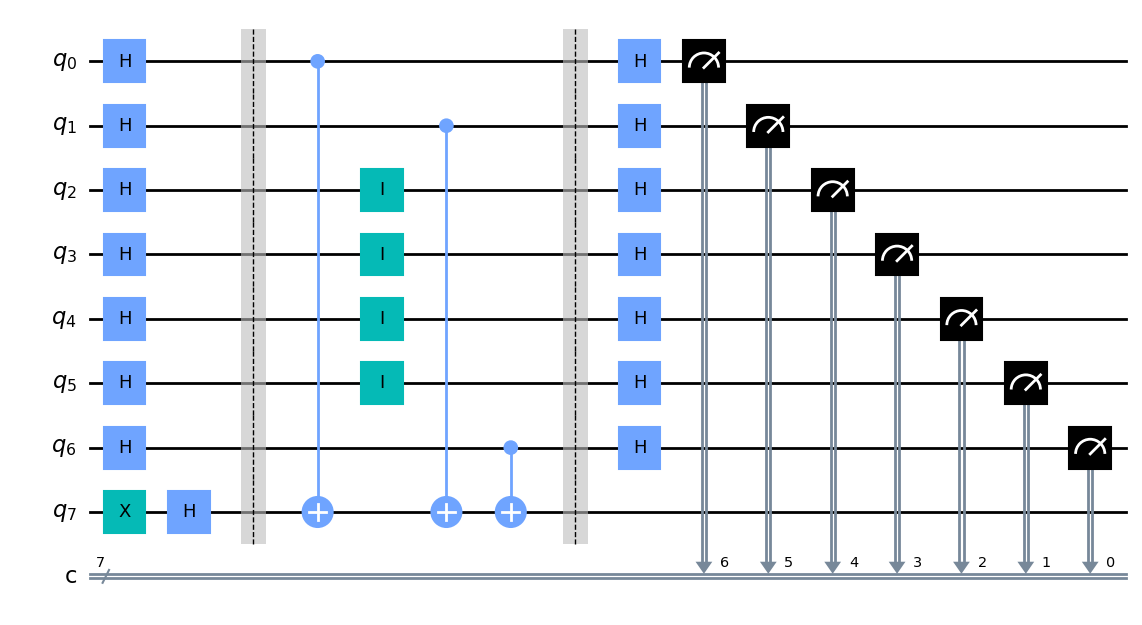

In [99]:
combined_circuit = start_circuit.compose(oracle, inplace=False)
combined_circuit = combined_circuit.compose(measure_circuit, inplace=False)

# Display the combined circuit
combined_circuit.draw('mpl')

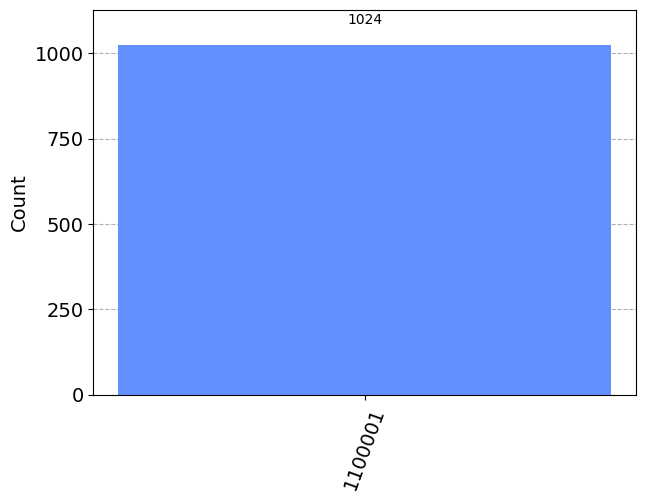

In [100]:
from qiskit import Aer
from qiskit_ibm_provider import *
from qiskit.visualization import plot_histogram
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
results = aer_sim.run(combined_circuit).result()
answer = results.get_counts()

plot_histogram(answer)

In [101]:
print("Hidden string {}\nGuess {}".format(
    secret_string, list(results.get_counts().keys())[0])
)
if list(results.get_counts().keys())[0] == secret_string:
    print("The guess was correct!")
else:
    print("The guess was not correct")

Hidden string 1100001
Guess 1100001
The guess was correct!
